# Playground: KYUL_v1

Testing ground for project development.

In [1]:
from config.settings import ProjectRoot, LocalDataPath, OutPath, PlotsPath, positions
from config.plot_config import set_plot_style; set_plot_style()

from models.event import Event
from models.waveform import Waveform

from utils.functions import linear

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [72]:
run = 1
seg = 4
run_path = os.path.join(LocalDataPath, f"Run{run}")
event = Event(run_path, seg)

if run < 17:
    # Expected signal around zero
    T_MIN = -50
    T_MAX = 75
else:
    # Expected signal after zero
    T_MIN = 1
    T_MAX = 85

# Defines our Region Of Interest for identifying peaks.
ROI_t = [T_MIN, T_MAX]

event.read_timestamp()
event.gather_waveforms()

event.set_ROI(ROI_t)
event.set_peak_threshold(125)
event.set_ingress_threshold(25)

L = 43 #cm
H = 50 #cm, initial height
positions=np.array([L*3+H, L*2+H, L*1+H, L*0+H]) 
linear_popt = [6.479600057173962, 73.07141538876651]
event.set_track_params(positions, linear_popt)

event.calculate_peak_and_ingress()
event.calculate_ingress_matrix()
event.calculate_delta_t_array()
event.calculate_track()

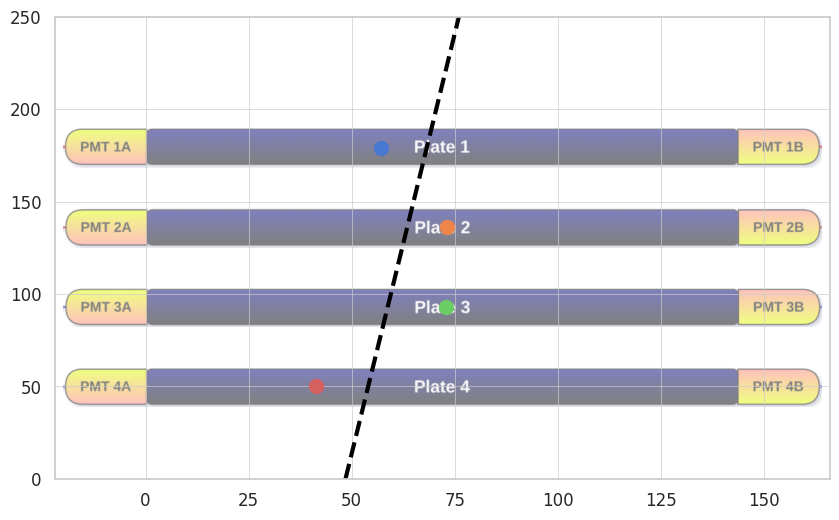

In [74]:
# Load the image
img = mpimg.imread("/home/hargy/Downloads/plate1.png")  # Replace with your image

hit_coordinates  = event.hit_coordinates
track_popt       = event.track_popt

x = np.linspace(0,250)
y = linear(x, *track_popt)

for idx, hit in enumerate(positions):
    plt.scatter(hit_coordinates[idx], hit, s = 100, zorder=3)

# Overlay the image at specific coordinates
w = 11
for i_num in range(4):
    img = mpimg.imread(f"/home/hargy/Downloads/plate{i_num+1}.png")  # Replace with your image
    plt.imshow(img, extent=[-20, 164, positions[i_num]-w, positions[i_num]+w], aspect='auto', alpha = 0.5)  # Adjust position with extent

plt.xlim(-22, 166)
plt.ylim(0,250)
plt.plot(y,x, lw = 3, color = 'black', linestyle = 'dashed');

In [76]:
import json
json_path = os.path.join(OutPath, 'calibration.json')
with open(json_path, 'r') as f:
    data = json.load(f)
    

In [78]:
data['popt']

[6.481662525826123, 73.09971165618377]